In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv("C:/Users/20109/OneDrive/Documents/Loan-prediction/train4.csv")
dataset.head() # Shows the first 5 elements of the dataset

test_dataset = pd.read_csv("C:/Users/20109/OneDrive/Documents/Loan-prediction/test.csv")

In [3]:
dataset.describe() # Previews a statistical overveiw for the data. 

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
dataset.info() # Previews a count for non-null values & the type of each column (feature) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Data cleaning

In [5]:
dataset.isnull().sum() # count for null values among the data.

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
# filling up categorical misising values with mode
cols=["Gender","Married","Self_Employed"] # categorical columns
for col in cols:
  dataset[col] = dataset[col].fillna(dataset[col].mode()[0])
  test_dataset[col] = test_dataset[col].fillna(test_dataset[col].mode()[0])
  

In [7]:
print(dataset.isnull().sum()) # count for null values among the data after we filled the categorical datas

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


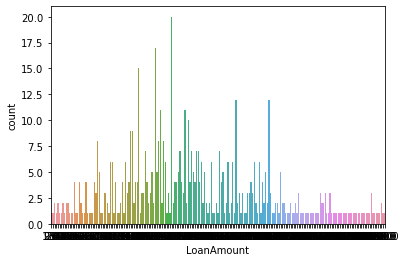

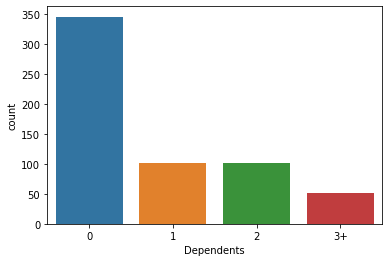

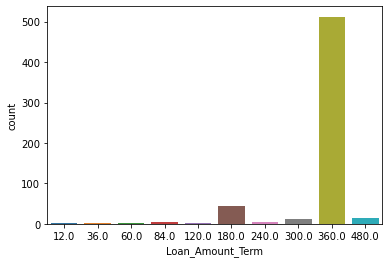

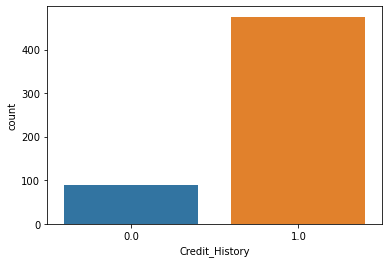

In [8]:
cols1=["LoanAmount","Dependents","Loan_Amount_Term","Credit_History"]
# to check see the frequencies and decide whether to use mode or not
for col1 in cols1:
    sns.countplot( x=col1 , data=dataset)
    plt.show()

In [9]:
# filling numerical values, in this step filling with the mode is the best choice for the chosen columns.
for col2 in cols1[1:4] :
    dataset[col2] = dataset[col2].fillna(dataset[col2].mode()[0])
    test_dataset[col2] = test_dataset[col2].fillna(test_dataset[col2].mode()[0])


<AxesSubplot:xlabel='LoanAmount'>

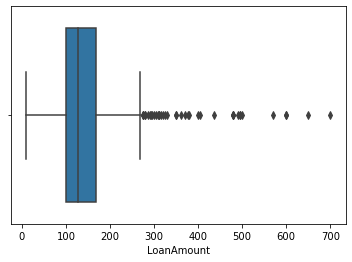

In [10]:
# we can not replace loan amount with mode because here mean or median will be better, but we have to check for outliers.
sns.boxplot(x="LoanAmount", data=dataset)

In [11]:
#we want to extract outliers so we will follow these steps:
#  Calculate the first and third quartile (Q1 and Q3).
# evaluate the interquartile range, IQR = Q3-Q1.
#Estimate the lower bound, the lower bound = Q1*1.5
#Estimate the upper bound, upper bound = Q3*1.5
#Replace the data points that lie outside of the lower and the upper bound with a NULL value.

In [12]:
Q1 = dataset['LoanAmount'].quantile(0.25)
Q3 = dataset['LoanAmount'].quantile(0.75)
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

outliers = []
for x in dataset['LoanAmount']:
    if ((x > up_lim) or (x < low_lim)):
         outliers.append(x)
percent=len(outliers)/len(dataset['LoanAmount'])*100
print(f"the percentage of outliers = {percent:4.2f} %") 

the percentage of outliers = 6.35 %


In [13]:
#we can't remove the outliers as it represent 6.35 % of the column
#median is our best choice as it's not affected by outliers

In [14]:
dataset['LoanAmount']=dataset['LoanAmount'].fillna(dataset['LoanAmount'].median())
test_dataset['LoanAmount']=test_dataset['LoanAmount'].fillna(test_dataset['LoanAmount'].median())


In [15]:
print(dataset.isnull().sum()) # check for missing values

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [16]:
# label encoding for categorical data
from sklearn.preprocessing import LabelEncoder
cols = ['Gender',"Married","Education",'Self_Employed',"Property_Area","Loan_Status"]
le = LabelEncoder()
for col in cols:
    dataset[col] = le.fit_transform(dataset[col])
for col in cols[:5]:    
    test_dataset[col] = le.fit_transform(test_dataset[col])

dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


## EDA 

The percentage of Y class : 0.31
The percentage of N class : 0.69


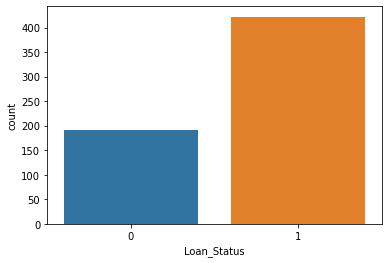

In [17]:
sns.countplot(dataset['Loan_Status']) #percentage of each class to see if there is any imbalance in the results
print('The percentage of Y class : %.2f' % (dataset['Loan_Status'].value_counts()[0] / len(dataset)))
print('The percentage of N class : %.2f' % (dataset['Loan_Status'].value_counts()[1] / len(dataset)))

<AxesSubplot:xlabel='Dependents', ylabel='count'>

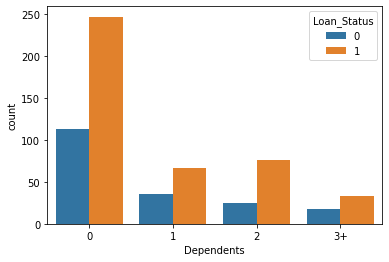

In [18]:
sns.countplot(x="Dependents", hue="Loan_Status", data=dataset)

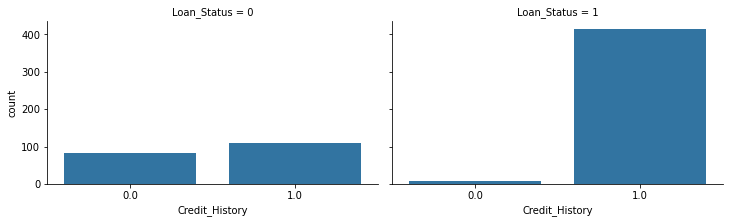

In [19]:
#Credit history vs loan status
grid = sns.FacetGrid(dataset,col='Loan_Status', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Credit_History')

#people having credit history have bigger chance getting loan

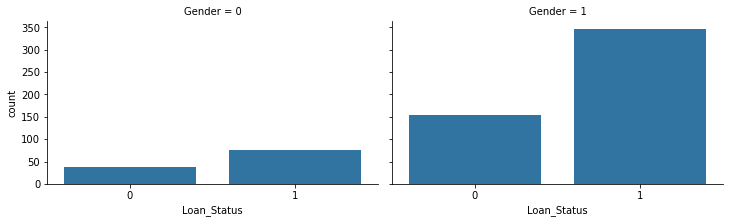

In [20]:
#Gender vs loan status
grid1 = sns.FacetGrid(dataset,col='Gender', size=3.2, aspect=1.6)
grid1.map(sns.countplot, 'Loan_Status')

# chances for getting loan for female is easier compared to male.

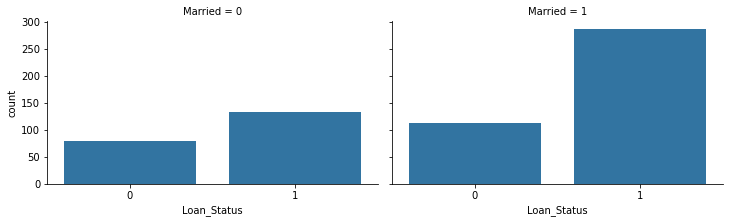

In [21]:
#Marital status vs loan status
grid2 = sns.FacetGrid(dataset,col='Married', size=3.2, aspect=1.6)
grid2.map(sns.countplot, 'Loan_Status')

#people who are married have better chance at loan approval.

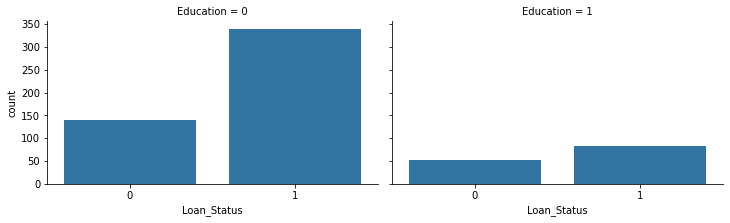

In [22]:
#loan status vs Education
grid3 = sns.FacetGrid(dataset,col='Education', size=3.2, aspect=1.6)
grid3.map(sns.countplot, 'Loan_Status')

#in both situation people are getting the loan but people who are graduate are getting loan easier compared to other.

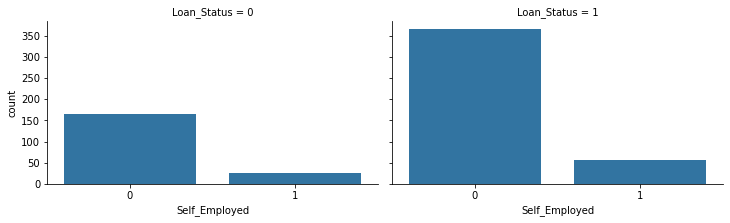

In [23]:
#Self_Employed vs Loan_status
grid4 = sns.FacetGrid(dataset,col='Loan_Status', size=3.2, aspect=1.6)
grid4.map(sns.countplot, 'Self_Employed')

#people having job got loan easily

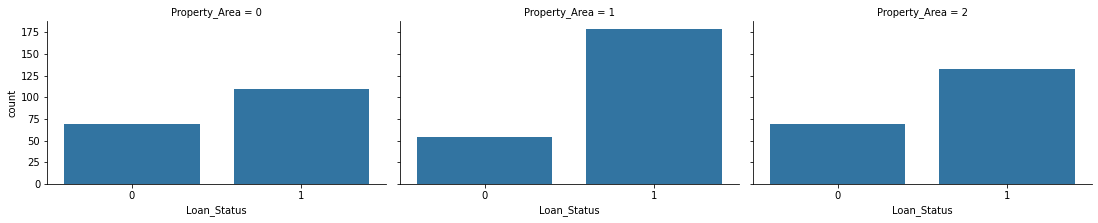

In [24]:
#property_area vs Loan_status
grid = sns.FacetGrid(dataset,col='Property_Area', size=3.2, aspect=1.6)
grid.map(sns.countplot, 'Loan_Status')

# property area has impact on loan status

In [25]:
# getting to know more about the dataset
dataset['Total_Income'] = dataset['ApplicantIncome'] + dataset['CoapplicantIncome'] #compress 2 columns in one
test_dataset['Total_Income'] = test_dataset['ApplicantIncome'] + test_dataset['CoapplicantIncome'] 

In [26]:
d_cols = ['ApplicantIncome', 'CoapplicantIncome','Loan_ID',"Dependents"]
dataset = dataset.drop(columns=d_cols, axis=1)
test_dataset = test_dataset.drop(columns=d_cols, axis=1)

dataset.head()

,Gender,Married,Education,Self_Employed,LoanAmount,Credit_History,Property_Area,Loan_Status,Total_Income
0,1,0,0,0,128.0,1.0,2,1,5849.0
1,1,1,0,0,128.0,1.0,0,0,6091.0
2,1,1,0,1,66.0,1.0,2,1,3000.0
3,1,1,1,0,120.0,1.0,2,1,4941.0
4,1,0,0,0,141.0,1.0,2,1,6000.0


In [27]:
x= dataset.loc[:, ["Gender","Married","Education","Self_Employed","LoanAmount","Credit_History","Property_Area","Total_Income"]].values
y = dataset.iloc[:, -2].values

In [28]:
from sklearn.model_selection import train_test_split # Split arrays or matrices into random train and test subsets.
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25 , random_state=0)

In [29]:
from sklearn.preprocessing import StandardScaler # Standardize features by removing the mean and scaling to unit variance.
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

#using PCA in our situation ( where num of features is so little & our accuracy isn't optimal ) wasn't the best choice as we tried to make the n_components = 5 to cover as much variance as possible but the accuracy was worst & below the code we tried

In [30]:
"""
from sklearn.decomposition import PCA
dataset1 = PCA(n_components=5)
x_train_pca = dataset1.fit_transform(x_train)
x_test_pca = dataset1.fit_transform(x_test)
print('Explained variation per principal component: {}'.format(dataset1.explained_variance_ratio_))

"""

"\nfrom sklearn.decomposition import PCA\ndataset1 = PCA(n_components=5)\nx_train_pca = dataset1.fit_transform(x_train)\nx_test_pca = dataset1.fit_transform(x_test)\nprint('Explained variation per principal component: {}'.format(dataset1.explained_variance_ratio_))\n\n"

In [31]:
from sklearn.svm import SVC # support Vector machine Classification algorithm.
classifier = SVC(kernel = 'rbf', random_state = 0) 
classifier.fit(x_train, y_train)

SVC(random_state=0)

In [32]:
y_pred = classifier.predict(x_test) # predict the values using the classifier model that we made
print(y_pred)

[1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1
 0 0 1 1 1 0]


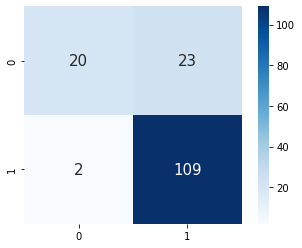

In [33]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred) # plot a confusion matrix to evaluate our models classifications accuracy.
sns.heatmap(cm , square=True, fmt='1.0f',  annot=True,  annot_kws={'size':15} , cmap='Blues')
plt.show()

In [34]:
acc = (metrics.accuracy_score(y_test,y_pred))*100
pre = (metrics.precision_score(y_test,y_pred))*100 #care about false-positive
rec = (metrics.recall_score(y_test,y_pred))*100    #care about false-negative

print(f"Accuracy is {acc:4.2f} %")
print(f"precision is {pre:4.2f} %")
print(f"recall is {rec:4.2f} %")


Accuracy is 83.77 %
precision is 82.58 %
recall is 98.20 %


In [35]:
test_sample= test_dataset.loc[:, ["Gender","Married","Education","Self_Employed","LoanAmount","Credit_History","Property_Area","Total_Income"]].values
#simple deploy on test data
test_pred = classifier.predict(test_sample)
print(test_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [36]:
#to save our model using pickle
# import pickle
# loan_pred_model =pickle.dumps(classifier) #created this object to serialze the model and save it
# load model
# loan_pred_model_ret=pickle.loads(loan_pred_model)
